In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv('testresults.csv')

df['total_cells'] = df.num_rows * df.num_cols
df['total_cells'] = pd.to_numeric(df['total_cells'])

def determine_shape(row):
    if row['num_rows'] == row['num_cols']:
        return 'square'
    elif row['num_cols'] > row['num_rows']:
        return 'wide'
    else:
        return 'tall'
    
df['sshape'] = df.apply(determine_shape, axis=1)

df.head(10)

,implementation,action,num_rows,num_cols,filled,time,total_cells,sshape
0,array,find: existing value,10000,100,0.3,0.790685,1000000,tall
1,linked_list,find: existing value,10000,100,0.3,0.015620,1000000,tall
2,csr,find: existing value,10000,100,0.3,1.755119,1000000,tall
3,array,find: non-existing value,10000,100,0.3,0.784583,1000000,tall
4,linked_list,find: non-existing value,10000,100,0.3,0.015997,1000000,tall
5,csr,find: non-existing value,10000,100,0.3,1.753671,1000000,tall
6,array,find: existing value,10000,100,1.0,1.259608,1000000,tall
7,linked_list,find: existing value,10000,100,1.0,0.016541,1000000,tall
8,csr,find: existing value,10000,100,1.0,2.657914,1000000,tall
9,array,find: non-existing value,10000,100,1.0,1.235753,1000000,tall


In [88]:
# figure params
colors = {'array': '#0c101c', 'linked_list': '#ec4700', 'csr': '#15c2a5'}
linestyles = {0.3: 'dotted', 1.0: '-'}
alphas = {0.3: 1, 1.0: 0.5}

# fc_dpi = 300
mm_figsize = (24, 8)

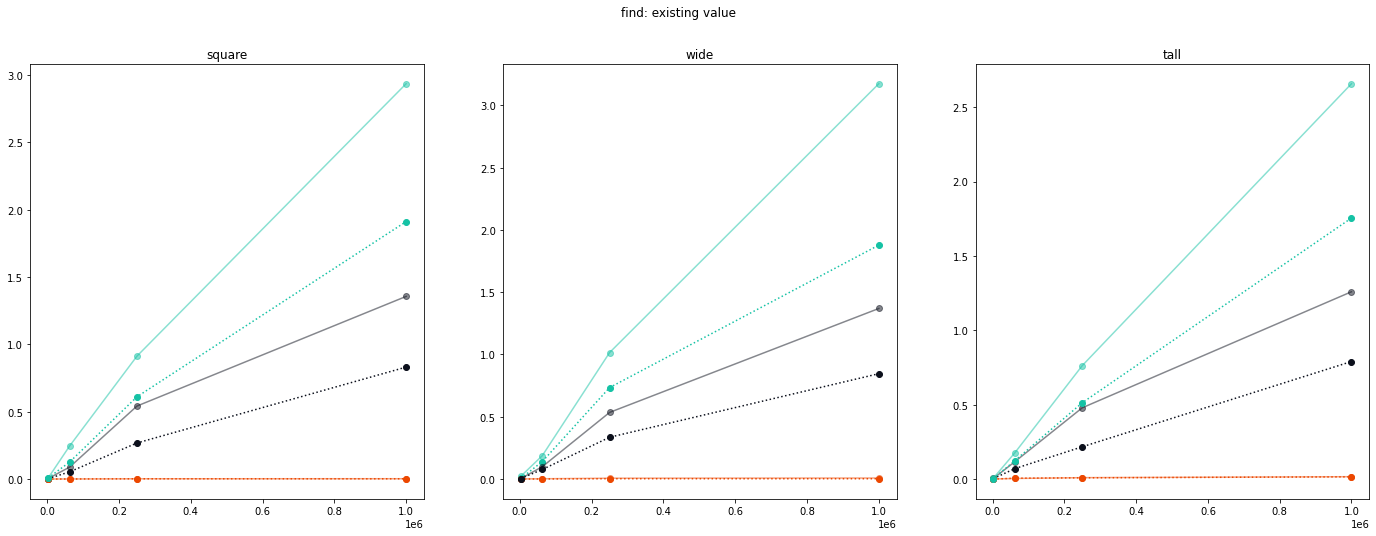

<Figure size 432x288 with 0 Axes>

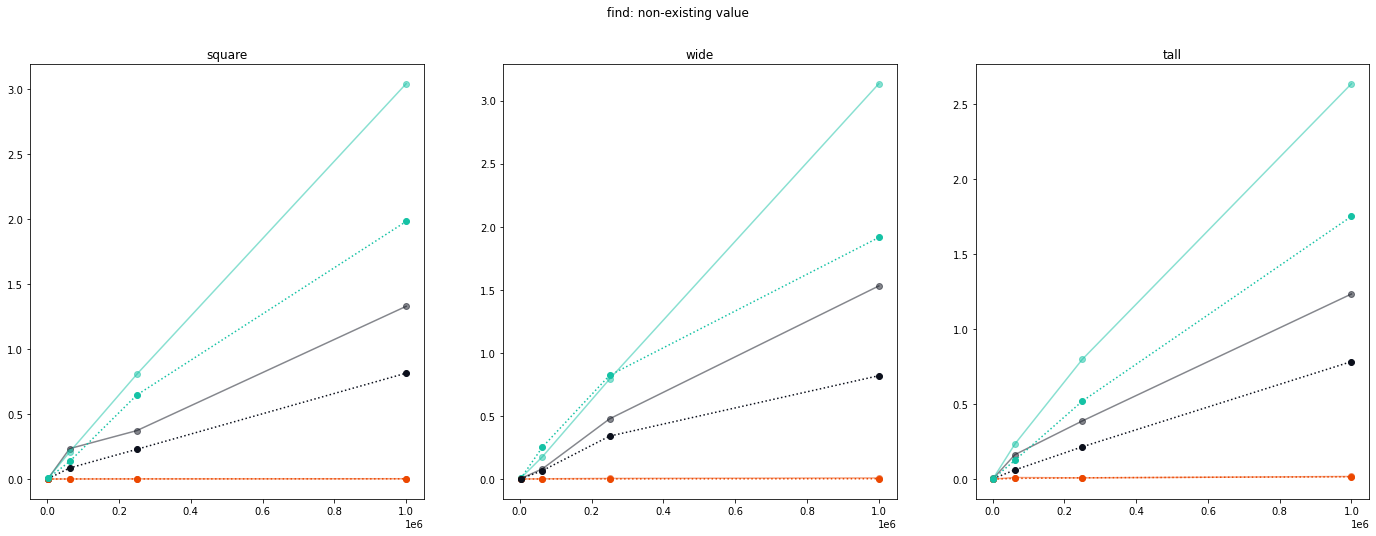

<Figure size 432x288 with 0 Axes>

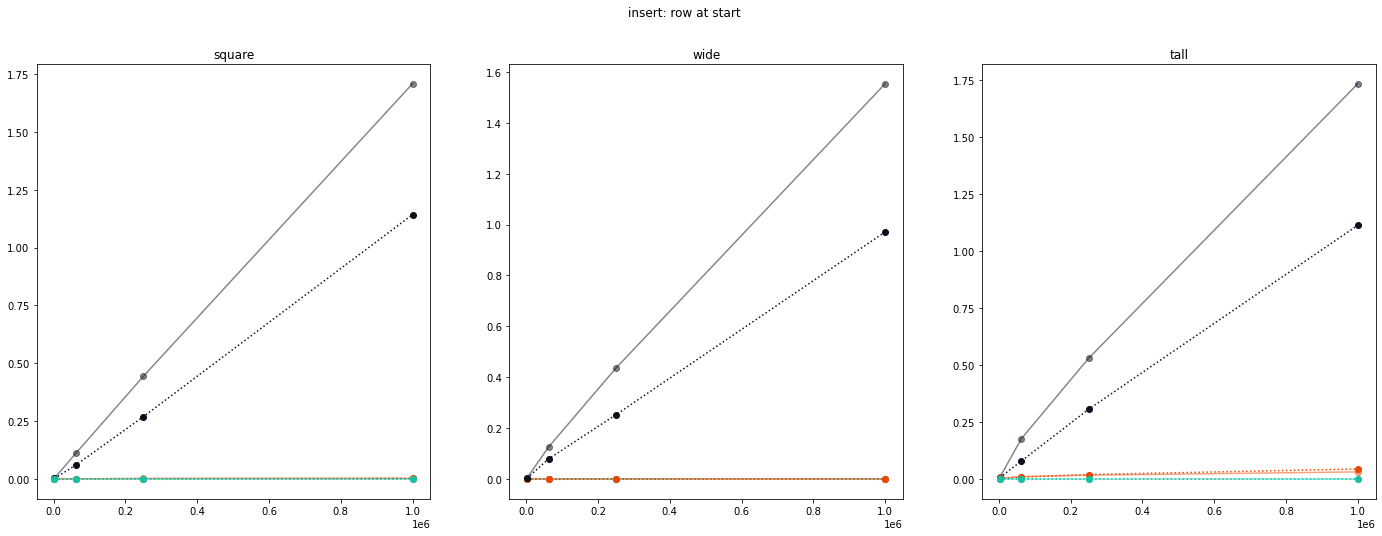

<Figure size 432x288 with 0 Axes>

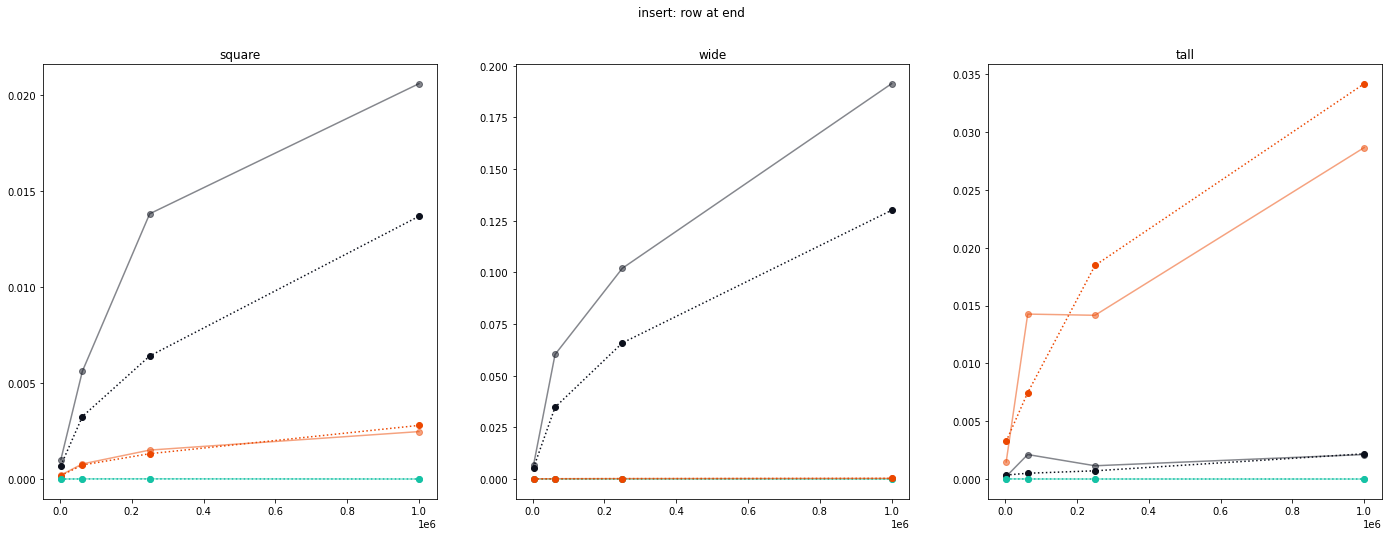

<Figure size 432x288 with 0 Axes>

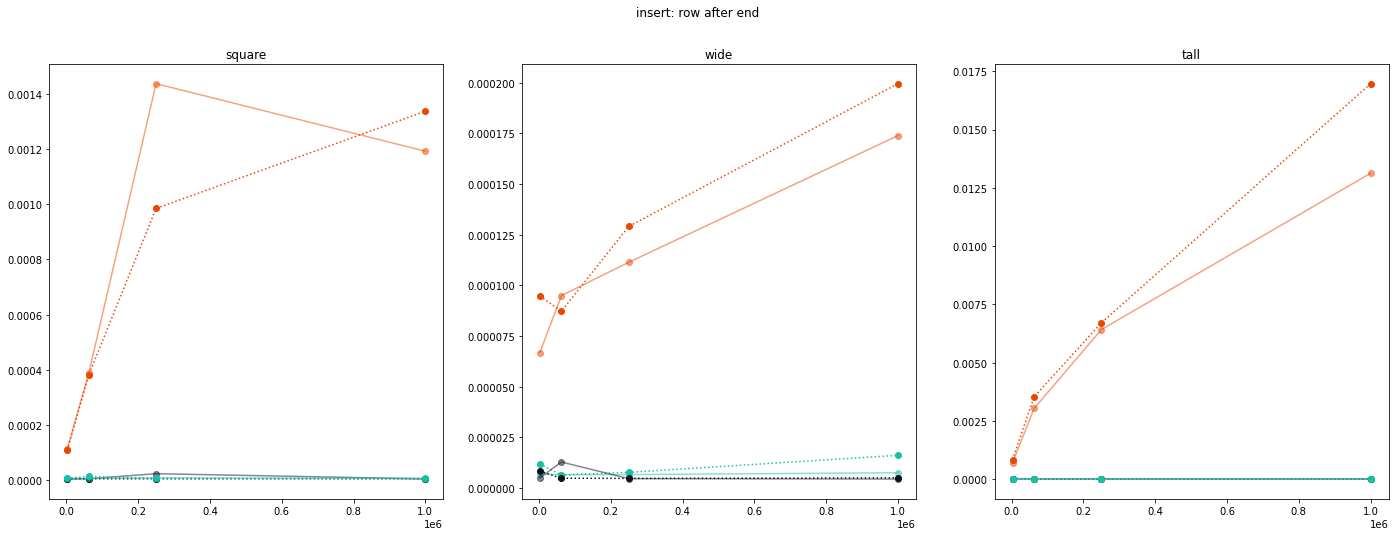

<Figure size 432x288 with 0 Axes>

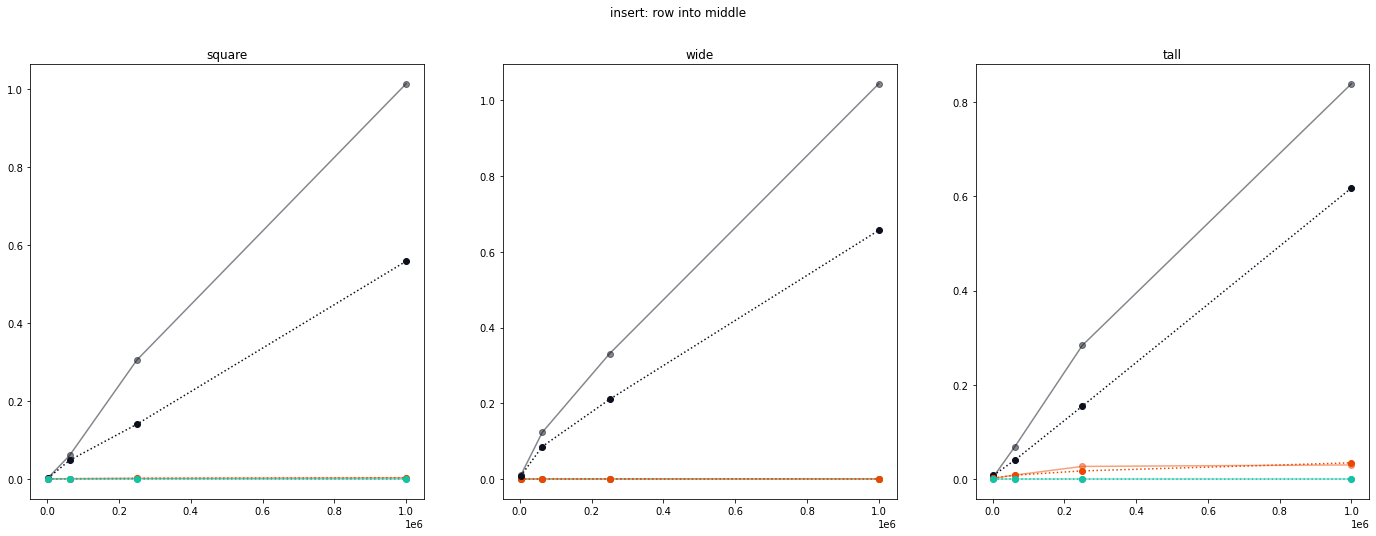

<Figure size 432x288 with 0 Axes>

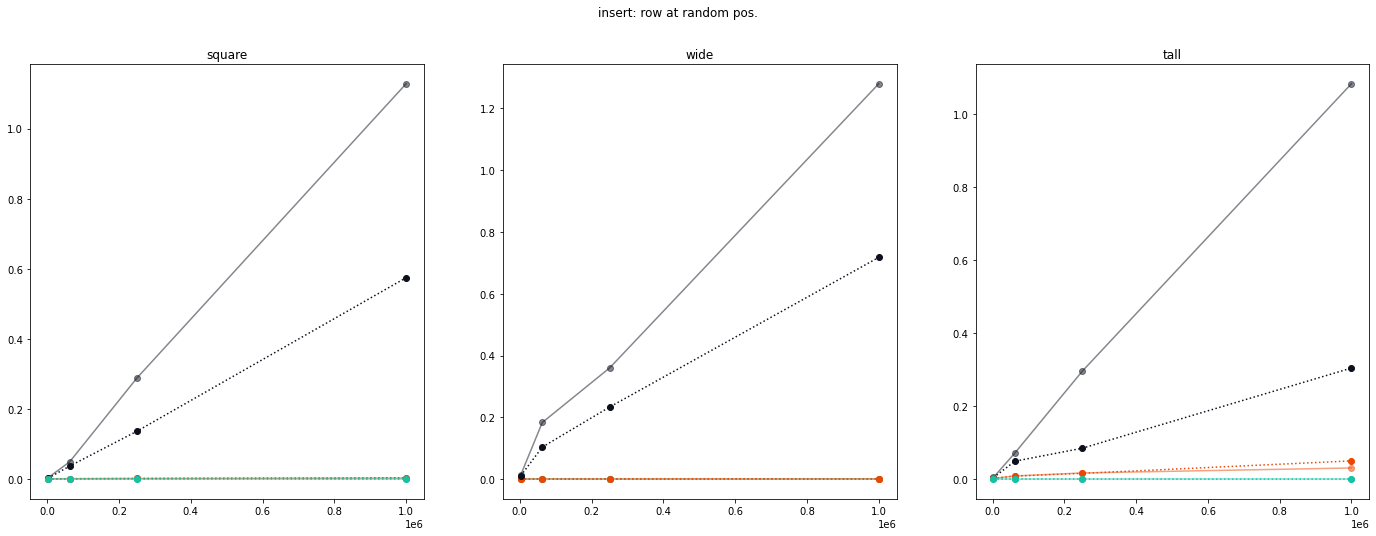

<Figure size 432x288 with 0 Axes>

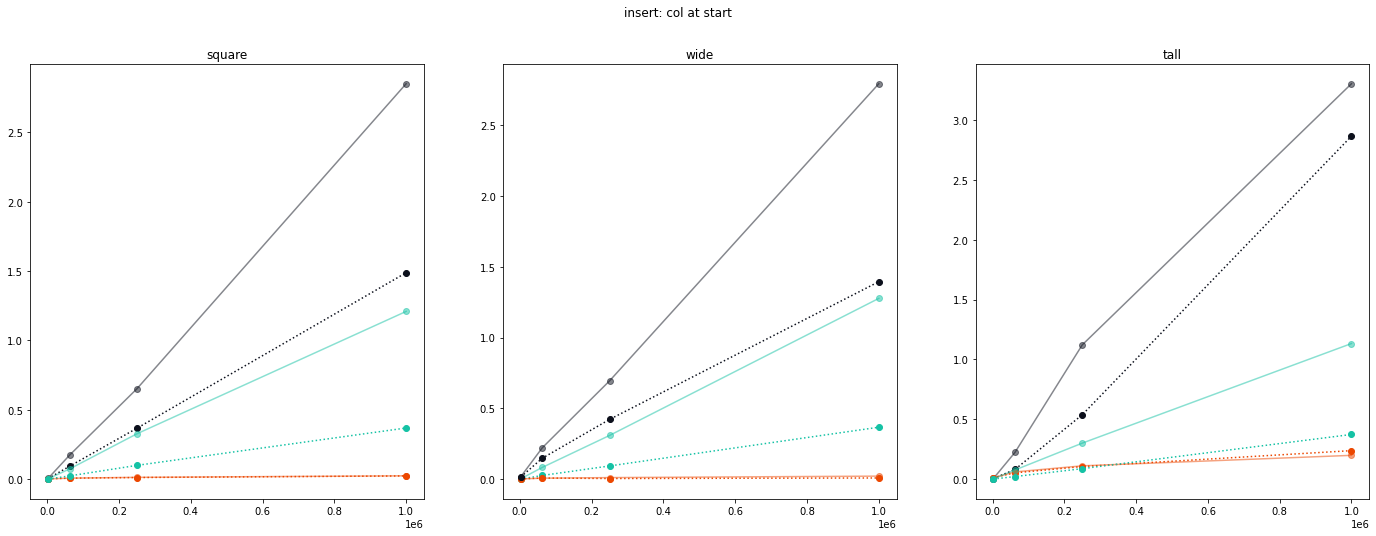

<Figure size 432x288 with 0 Axes>

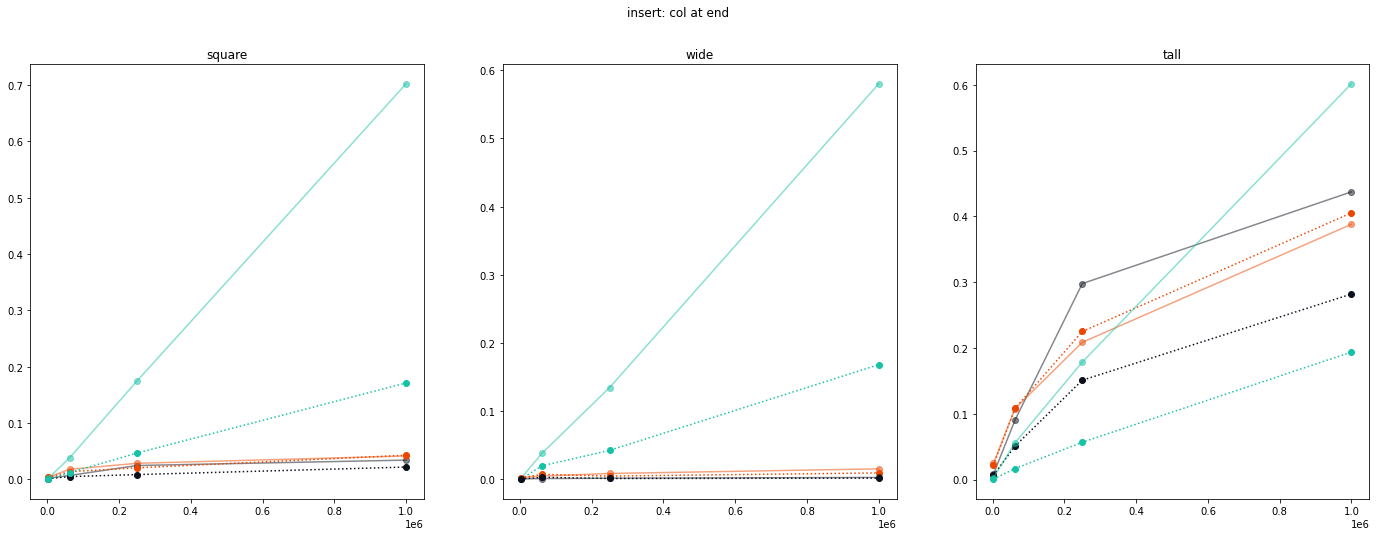

<Figure size 432x288 with 0 Axes>

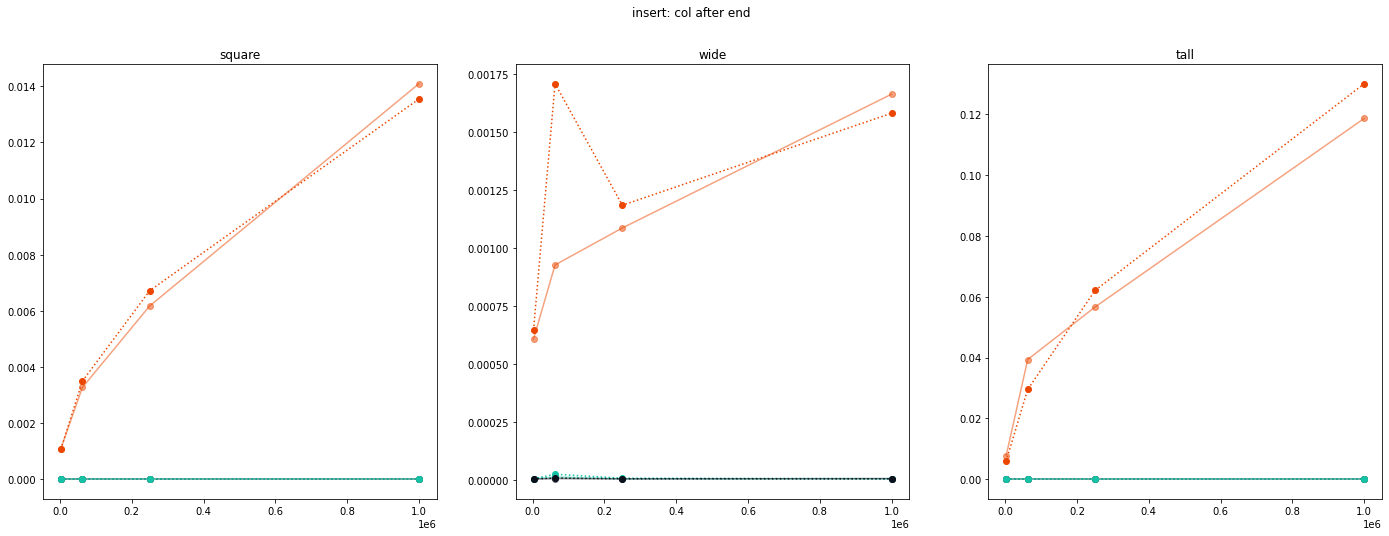

<Figure size 432x288 with 0 Axes>

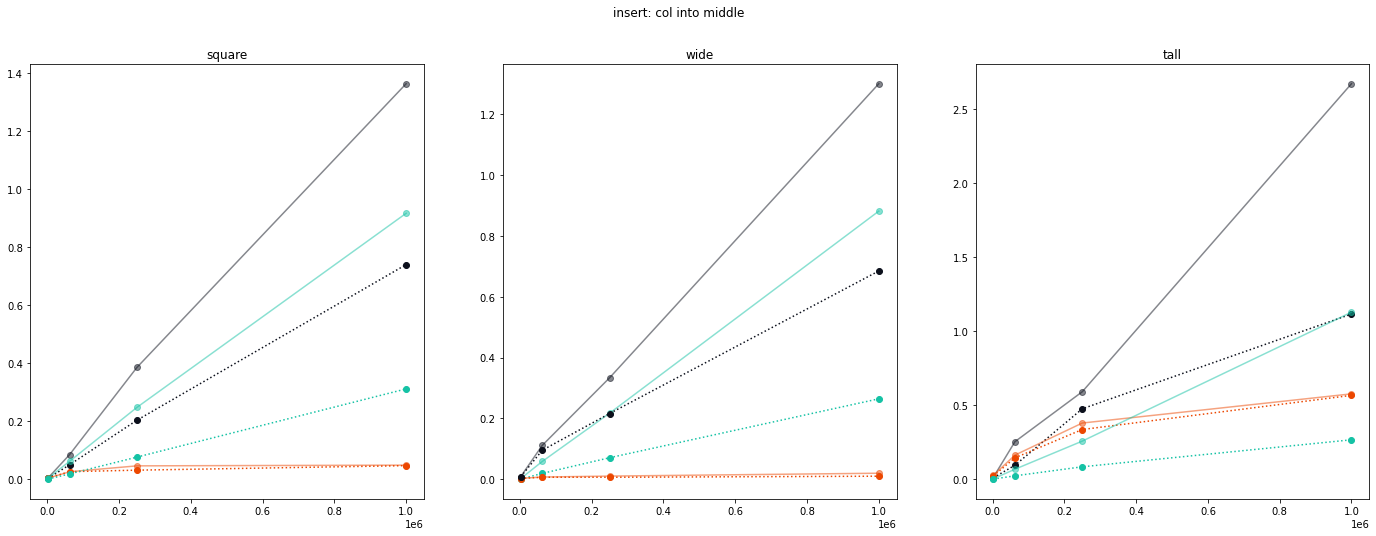

<Figure size 432x288 with 0 Axes>

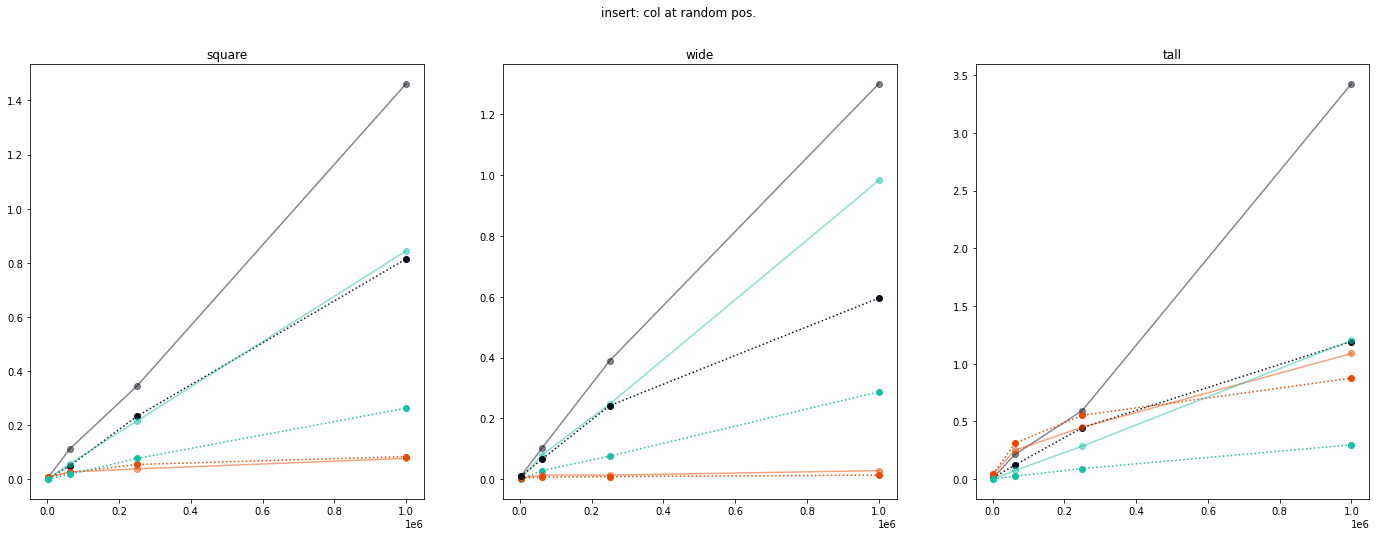

<Figure size 432x288 with 0 Axes>

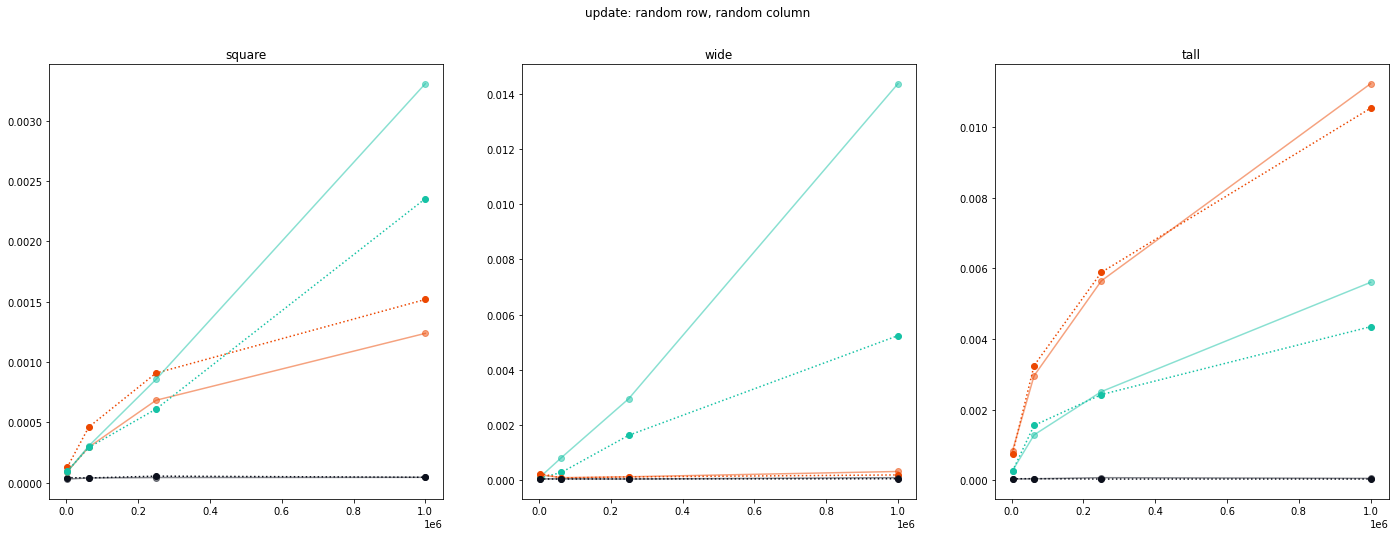

<Figure size 432x288 with 0 Axes>

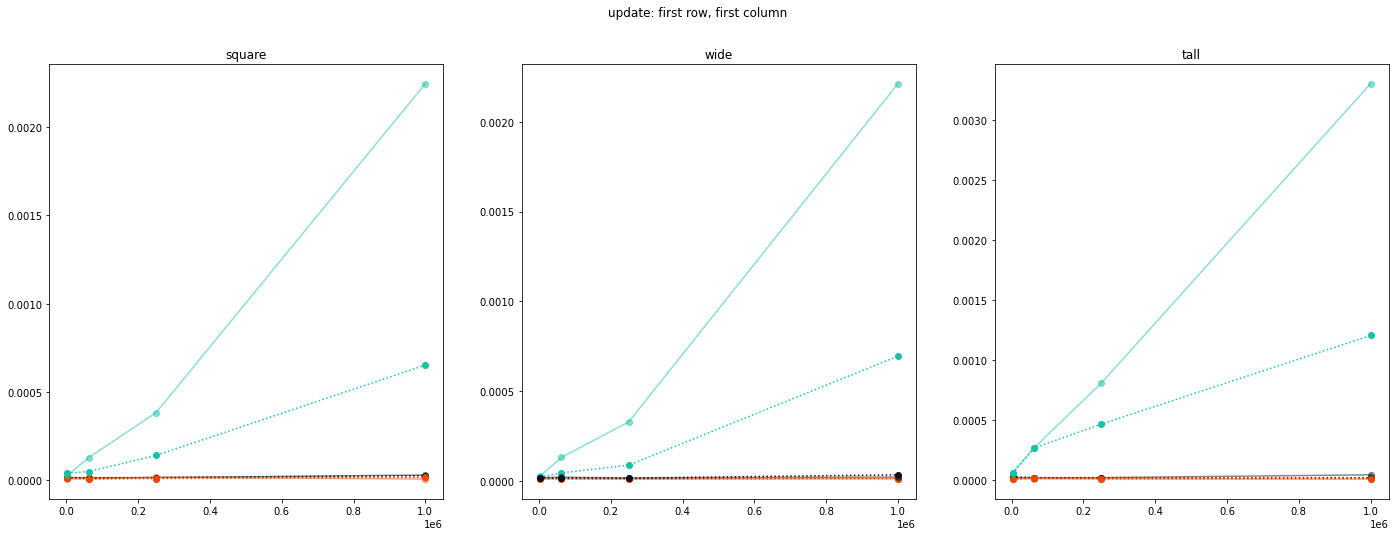

<Figure size 432x288 with 0 Axes>

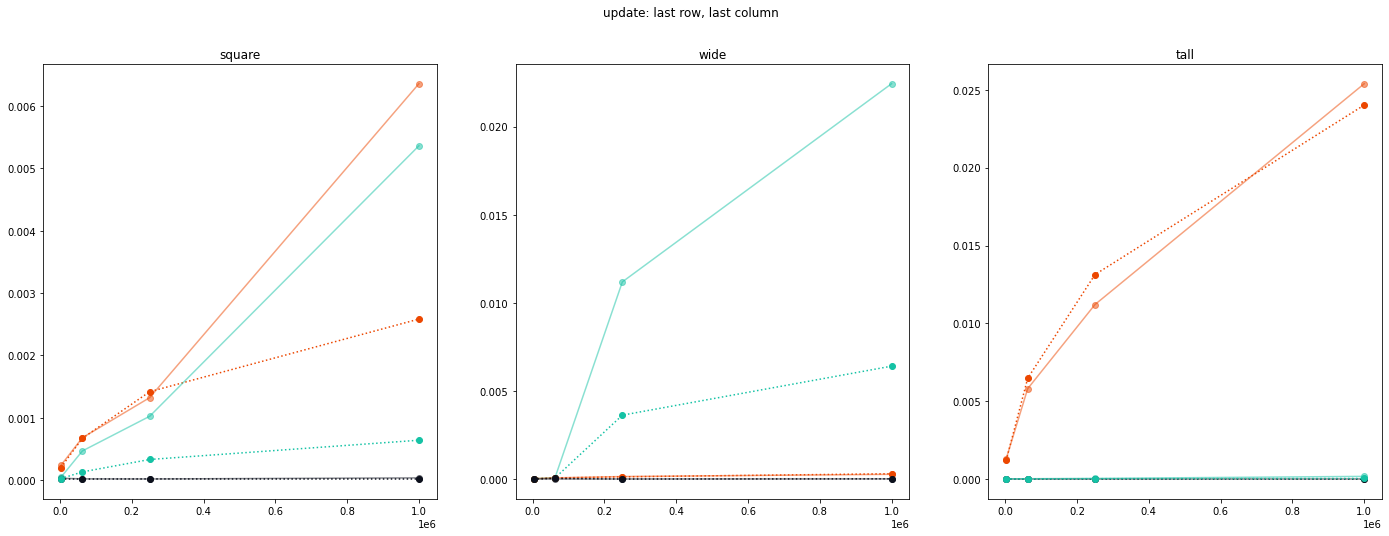

<Figure size 432x288 with 0 Axes>

In [89]:
operation_names = df.action.unique()        # get list of operations

# op = 'find: existing value'

for op in operation_names:
    op_df = df[df.action == op]
    op_df = op_df.sort_values('total_cells')

    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=mm_figsize)

    # square
    shape_df = op_df[op_df.sshape == 'square']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[0].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # wide
    shape_df = op_df[op_df.sshape == 'wide']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[1].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)

    # tall
    shape_df = op_df[op_df.sshape == 'tall']

    for implementation in shape_df['implementation'].unique():
        for filled in shape_df['filled'].unique():
            data = shape_df[(shape_df['implementation'] == implementation) & (shape_df['filled'] == filled)]
            label = f"{implementation} ({filled})"
            color = colors[implementation]
            alpha = alphas[filled]
            linestyle = linestyles[filled]
            axs[2].plot(data['total_cells'], data['time'], marker='.', markersize=12, label=label, color=color, linestyle=linestyle, alpha=alpha)


    # Set x-axis tick formatter to show commas as thousand separators
    # formatter = mtick.StrMethodFormatter('{x:,.0f}')
    # plt.gca().get_xaxis().set_major_formatter(formatter)

    # Set axis labels and legend
    ax.set_xlabel('Total Cells')
    ax.set_ylabel('Time (s)')
    ax.legend()

    # set titles
    axs[0].set_title('square')
    axs[1].set_title('wide')
    axs[2].set_title('tall')
    fig.suptitle(op, fontsize=16)

    # Show the plot
    plt.show()
        
    op = op.replace(':','')
    plt.savefig(f"graphs/{op}.jpg", bbox_inches='tight', dpi=300)    

In [46]:
op_df.sort_values(['implementation', 'filled'])

,implementation,action,num_rows,num_cols,filled,time,total_cells,sshape
12,array,find: existing value,1000,1000,0.3,0.831254,1000000,square
48,array,find: existing value,250,250,0.3,0.053645,62500,square
84,array,find: existing value,500,500,0.3,0.267580,250000,square
120,array,find: existing value,50,50,0.3,0.002358,2500,square
18,array,find: existing value,1000,1000,1.0,1.356264,1000000,square
54,array,find: existing value,250,250,1.0,0.088823,62500,square
90,array,find: existing value,500,500,1.0,0.541915,250000,square
126,array,find: existing value,50,50,1.0,0.003450,2500,square
14,csr,find: existing value,1000,1000,0.3,1.912057,1000000,square
50,csr,find: existing value,250,250,0.3,0.126145,62500,square


find existing value
find non-existing value
insert row at start
insert row at end
insert row after end
insert row into middle
insert row at random pos.
insert col at start
insert col at end
insert col after end
insert col into middle
insert col at random pos.
update random row, random column
update first row, first column
update last row, last column


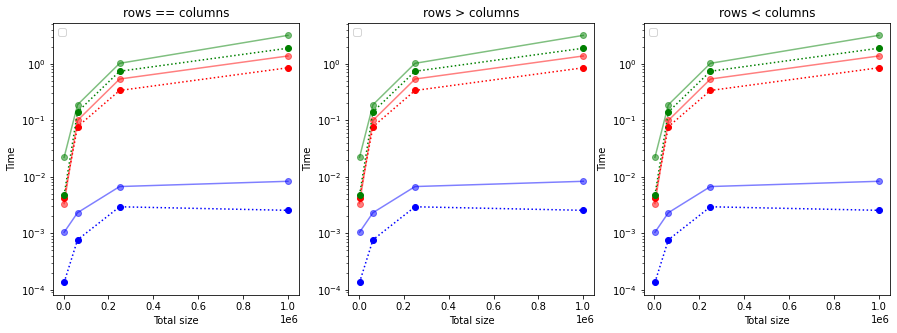

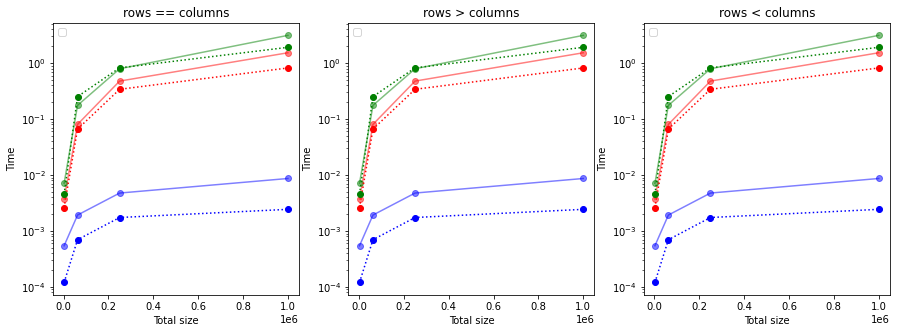

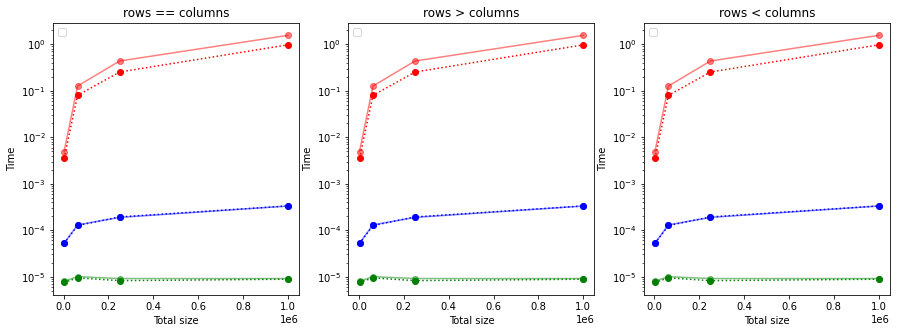

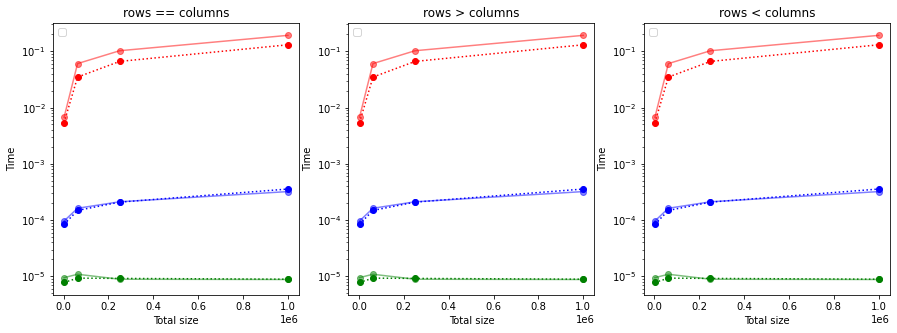

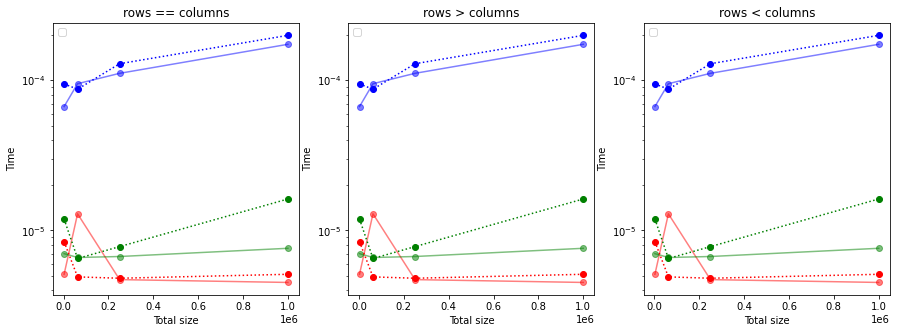

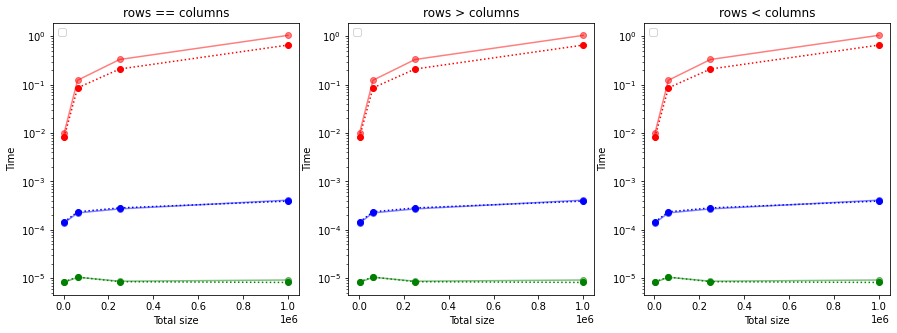

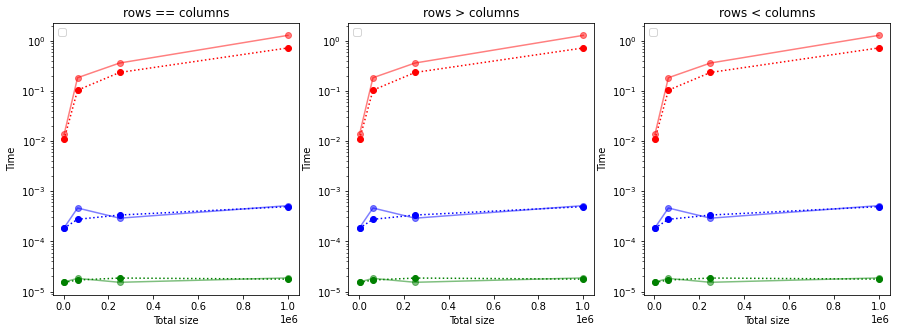

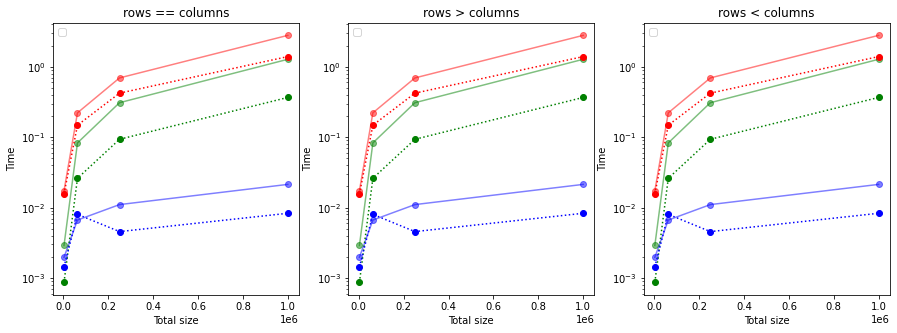

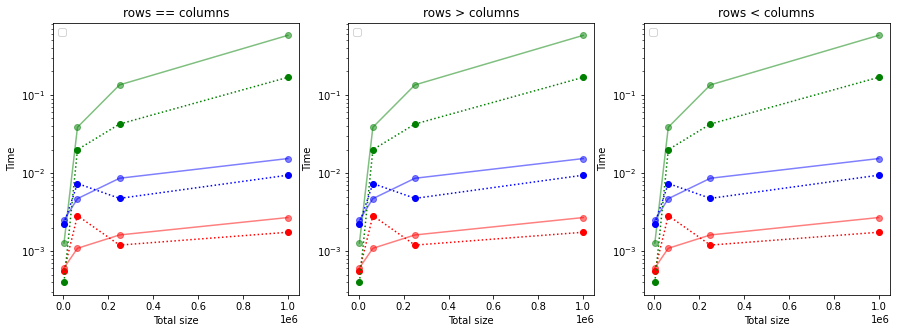

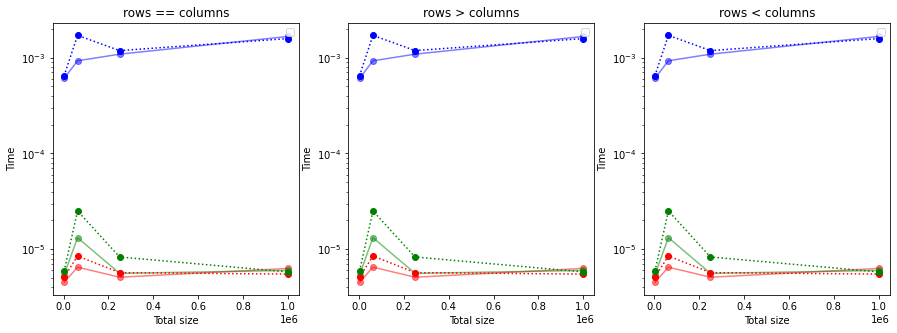

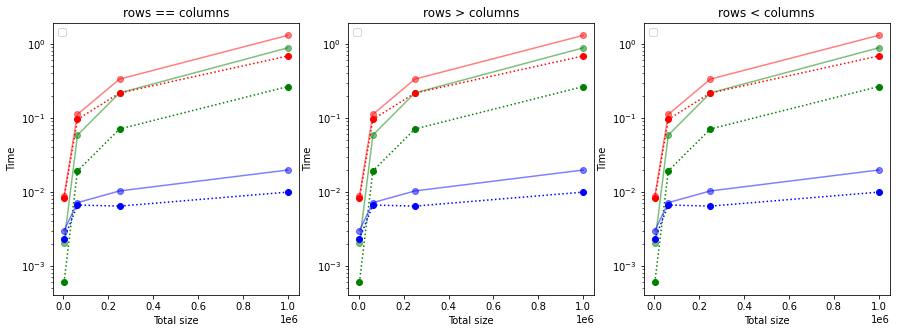

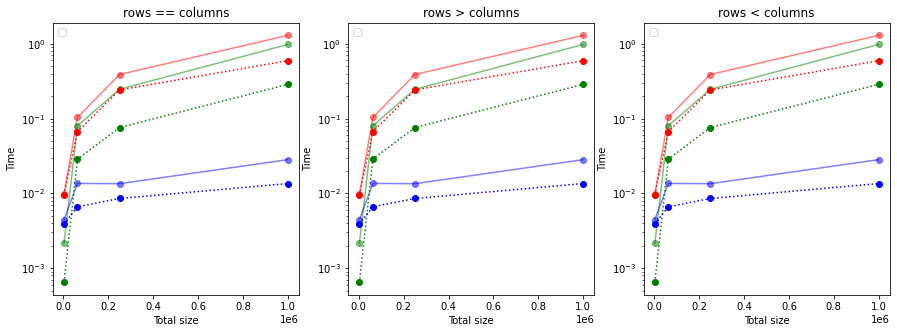

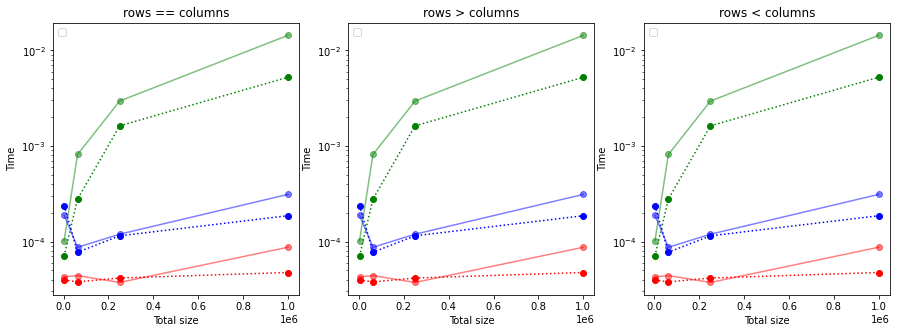

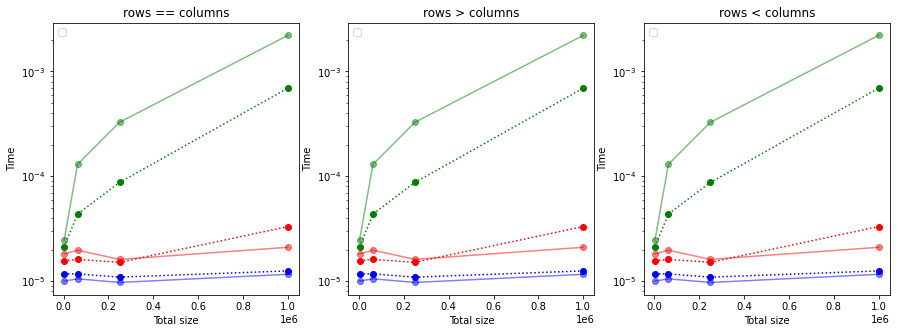

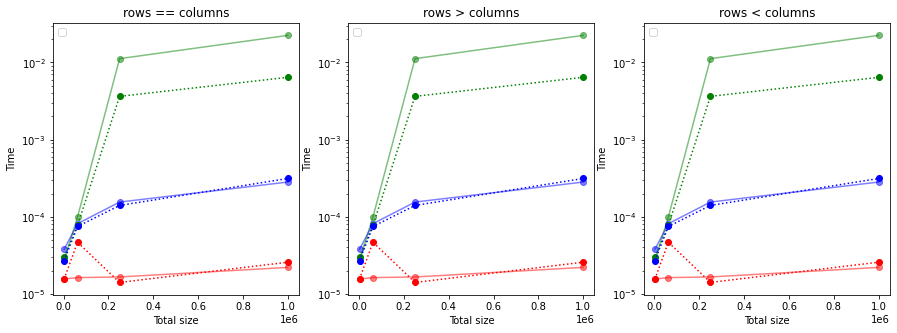

In [173]:
import os

# Get unique values in the action column
unique_actions = df.action.unique()

# Iterate over unique actions
for action in unique_actions:
    # Filter the dataframe for the current action
    current_df = df.loc[df.action == action, :]

    # Plot 1
    same_rows_cols = current_df[current_df['num_rows'] == current_df['num_cols']]
    partial_filled = same_rows_cols[same_rows_cols["filled"] == 0.3]
    full = same_rows_cols[same_rows_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 1
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    ax1 = axs[0]

    # Plot 2
    more_rows_than_cols = current_df[current_df['num_rows'] > current_df['num_cols']]

    partial_filled = more_rows_than_cols[more_rows_than_cols["filled"] == 0.3]
    full = more_rows_than_cols[more_rows_than_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 2
    ax2 = axs[1]

    

    # Plot 3
    less_rows_than_cols = current_df[current_df['num_rows'] < current_df['num_cols']]

    partial_filled = less_rows_than_cols[less_rows_than_cols["filled"] == 0.3]
    full = less_rows_than_cols[less_rows_than_cols["filled"] == 1.0]

    # Create 2 pivot tables to aggregate the data by implementation and separate it by fill level
    full_table = pd.pivot_table(full, values='time', index=['size'], columns=['implementation'])
    partial_table = pd.pivot_table(partial_filled, values='time', index=['size'], columns=['implementation'])

    # Create subplot 3
    ax3 = axs[2]
    
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax1, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax1, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax1.set_xlabel("Total size")
    ax1.set_ylabel("Time")
    ax1.legend([])
    ax1.set_title("rows == columns")
    ax1.set_yscale('log')
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax2, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax2, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax2.set_xlabel("Total size")
    ax2.set_ylabel("Time")
    ax2.legend([])
    ax2.set_title("rows > columns")
    ax2.set_yscale('log')
    # Plot the data as a line graph with different colours for each implementation and filled value
    full_table.plot(ax=ax3, marker='o', linestyle='solid', color=['red', 'green', 'blue'], alpha=0.5)
    partial_table.plot(ax=ax3, marker='o', linestyle='dotted', color=['red', 'green', 'blue'])
    ax3.set_xlabel("Total size")
    ax3.set_ylabel("Time")
    ax3.legend([])
    ax3.set_title("rows < columns")
    ax3.set_yscale('log')

    # Save plot as image file with the name of the current action
    action = action.replace(':','')
    print(action)
    plt.savefig(f"graphs/{action}.jpg", bbox_inches='tight', dpi=300)

